In [16]:
# import base packages into the namespace for this program

import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
# import seaborn as sns  # pretty plotting, including heat map
np.set_printoptions(precision=3)
pd.options.display.float_format = '{:.3f}'.format
# sns.set()
from sklearn import metrics
import scipy.stats as st 
import numpy as np
import pandas as pd
# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation
import os
from sklearn.model_selection import train_test_split
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier,  BaggingClassifier, RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier,  BaggingClassifier, RandomForestRegressor
from sklearn.model_selection import KFold, GridSearchCV, cross_validate, cross_val_score, cross_val_predict


In [ ]:
# Find the Best Model

In [ ]:
training = pd.read_csv('data/cs-training.csv')
training = training.dropna()  
train_df, valid_df = train_test_split(training, test_size = 0.3, random_state = 0)
X = train_df.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis = 1)
y = train_df['SeriousDlqin2yrs']
clfs = RandomForestClassifier
mdl_param =  {'n_estimators': [10, 20],  'max_features': ['auto','sqrt'], 'n_jobs':[-1],
                      'max_depth':[2, 4, 6, 8], 'min_samples_leaf':[5,10,20], 'min_samples_split':[2,5,10] }


In [37]:
clf = GridSearchCV(RandomForestClassifier(), mdl_param,  scoring="roc_auc", return_train_score=True, cv=10)
clf.fit(X,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [38]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [39]:
rfc = clf.best_estimator_

# Training the model

In [63]:
training = pd.read_csv('data/cs-training.csv')
training.fillna(training.median(),inplace=True)
train_df, valid_df = train_test_split(training, test_size = 0.3, random_state = 0)

X_train = train_df.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis = 1)
y_train = train_df['SeriousDlqin2yrs']
X_test = valid_df.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis = 1)
y_test = valid_df['SeriousDlqin2yrs']

In [61]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [62]:
rfc.predict_proba(X_train)

array([[0.986, 0.014],
       [0.993, 0.007],
       [0.938, 0.062],
       ...,
       [0.804, 0.196],
       [0.989, 0.011],
       [0.774, 0.226]])

# Performance Assesment

In [77]:
from sklearn.utils import resample
from sklearn.metrics import  accuracy_score
from sklearn.metrics import  precision_score
from sklearn.metrics import  recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score as auc
def resampling():
    global X_train, y_train , X_test , y_test
    train, test =   train_test_split(training, test_size = 0.30, random_state = 0)
    # train
    minority= train[train['SeriousDlqin2yrs']==1]
    majority= train[train['SeriousDlqin2yrs']==0]

    train_new=resample(minority, replace=True,n_samples=len(majority),random_state=123)
    train_new=pd.concat([majority,train_new])

    X_train =  train_new.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis=1)
    y_train =  train_new['SeriousDlqin2yrs']
    
    
    minority= test[test['SeriousDlqin2yrs']==1]
    majority= test[test['SeriousDlqin2yrs']==0]

    test_new=resample(minority, replace=True,n_samples=len(majority),random_state=123)
    test_new=pd.concat([majority,test_new])
    
    
    X_test = test_new.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis=1)
    y_test= test_new['SeriousDlqin2yrs'] 
resampling()   

In [78]:
def prediction_metrics(classifier,regType ):
    resampling()
    
    classifier.fit(X_train, y_train)
    
    auc_score_train=auc(y_train, classifier.predict_proba(X_train)[:,1] )
    acu_score_test=auc(y_test, classifier.predict_proba(X_test)[:,1] )
    precision_train= precision_score(y_train, classifier.predict(X_train) )
    precision_test= precision_score(y_test, classifier.predict(X_test) )
    recall_train=   recall_score(y_train, classifier.predict(X_train) )
    recall_test=  recall_score(y_test, classifier.predict(X_test) )
    accuracy_train=   accuracy_score(y_train, classifier.predict(X_train) )
    accuracy_test=   accuracy_score(y_test, classifier.predict(X_test) )
    print("\n--------"+ regType + "------------")
    
    print('\nConfusion Matrix Training')
    print(confusion_matrix(y_train, classifier.predict(X_train)  ))
    print('\nConfusion Matrix testing')
    print( confusion_matrix(y_test, classifier.predict(X_test) ))
    print('\nTraining AUC')
    print(auc_score_train)
    print('\nTest  AUC')
    print(acu_score_test)

    
    print('\nPrecision Train')
    print(precision_train)
    print('\nPrecision Test')
    print(precision_test)
    print('\nRecall train')
    print( recall_train)
    print('\nRecall test')
    print( recall_test)
  
    print('\nAccurancy train')
    print( accuracy_train)
    
    print('\nAccurancy test')
    print( accuracy_test)
    
    
    return [(auc_score_train,precision_train, recall_train, accuracy_train),
            (acu_score_test,precision_test, recall_test, accuracy_test) ]

In [79]:
train_metricLR, test_metricLR = prediction_metrics(rfc, regType="Random Forest" )


--------random Forest------------

Confusion Matrix Training
[[79609 18400]
 [20957 77052]]

Confusion Matrix testing
[[33957  8008]
 [10697 31268]]

Training AUC
0.8771429256383377

Test  AUC
0.8563396868839697

Precision Train
0.8072329547835562

Precision Test
0.7961095834606375

Recall train
0.7861726984256547

Recall test
0.7450971047301322

Accurancy train
0.7992174188084767

Accurancy test
0.7771357083283689


In [81]:
train_metric = pd.DataFrame([pd.Series(train_metricLR),  pd.Series(test_metricLR) ], index=["Train",'Test'])
train_metric.columns = ['AUC','Precision','Recall','Accuracy']
train_metric

,AUC,Precision,Recall,Accuracy
Train,0.877,0.807,0.786,0.799
Test,0.856,0.796,0.745,0.777


In [94]:
import seaborn as sns  # pretty plotting, including heat map
sns.set()

In [100]:
def train_test():
    global X_train, y_train , X_test , y_test
    train_df, valid_df = train_test_split(training, test_size = 0.3, random_state = 0)

    X_train = train_df.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis = 1)
    y_train = train_df['SeriousDlqin2yrs']
    X_test = valid_df.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis = 1)
    y_test = valid_df['SeriousDlqin2yrs']



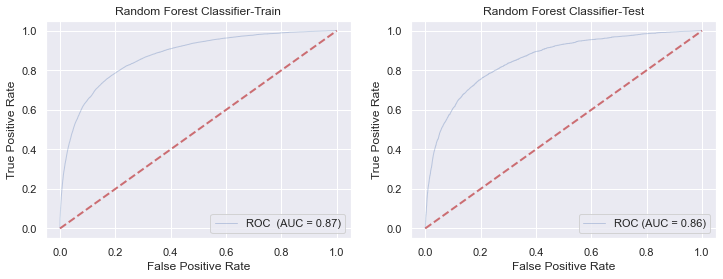

In [101]:
from sklearn.metrics import plot_roc_curve
def plot_classfier(classifer, title):
#     resampling()
    train_test()
    fig, ax = plt.subplots(1,2,  figsize=(12,4))

    classifer.fit(X_train, y_train)
    viz = plot_roc_curve(rfc, X_train, y_train,
                                 name='ROC ' ,
                                 alpha=0.3, lw=1, ax=ax[0])
    ax[0].plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',   label='Chance', alpha=.8)
    ax[0].set_title(title + "-Train")
    viz = plot_roc_curve(rfc, X_test, y_test,
                                 name='ROC'.format(1),
                                 alpha=0.3, lw=1, ax=ax[1])
    ax[1].plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',   label='Chance', alpha=.8)
    ax[1].set_title(title + "-Test");
    
plot_classfier(rfc,'Random Forest Classifier')

In [102]:
rfc.predict_proba(X_test)[:,1].mean()

0.06640831350228896

In [110]:
submit = pd.read_csv("data/cs-test.csv")

X_submit = submit.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis = 1)
X_submit  = X_submit.fillna(training.median())
submit_proba = rfc.predict_proba(X_submit)[:,1] 

In [ ]:
# Create Kaggle submission file

In [113]:
df_submission =pd.DataFrame(submit_proba,columns=['Probability']  )
df_submission.index.name = 'Id'
df_submission.index = range(1,len(df_submission)+1)
print(df_submission)
df_submission.to_csv("data/submission.csv", index_label="Id") 

        Probability
1             0.080
2             0.041
3             0.015
4             0.073
5             0.107
...             ...
101499        0.023
101500        0.342
101501        0.008
101502        0.146
101503        0.039

[101503 rows x 1 columns]


# Persist Models

In [114]:
import pickle
pickle.dump(rfc,  open('model/predict.pickle', "wb" ))
pickle.dump(training.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis = 1).median(),open('model/median.pickle','wb'))